In [1]:
import pandas as pd
import preprocessing as pp
import numpy as np
from sklearn.ensemble import RandomForestClassifier
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import utils as utils

In [2]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)

In [3]:
X, y = utils.importar_datos()

### Modelo 1

- Preprocesamiento con LaberEncoding
- Hiperparametros por defecto

In [4]:
preprocessor = pp.PreprocessingLE()
model = RandomForestClassifier(random_state=pp.RANDOM_STATE, n_jobs=-1)

In [5]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

#### Metricas

In [6]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.851610,0.022192,0.849319,0.904711,0.826398
accuracy,0.810272,0.039169,0.810237,0.870000,0.750000
precision,0.784811,0.065890,0.781818,0.903226,0.675676
recall,0.700658,0.042847,0.700326,0.763158,0.657895
f1 score,0.739710,0.049099,0.738832,0.811594,0.666667


### Modelo 2

- Preprocesamiento con OneHotEncoding
- Hiperparametros por defecto

In [7]:
preprocessor = pp.PreprocessingOHE()
model = RandomForestClassifier(random_state=pp.RANDOM_STATE, n_jobs=-1)

In [8]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

#### Metricas

In [9]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.847481,0.034986,0.846760,0.917657,0.809211
accuracy,0.797760,0.028113,0.797753,0.830000,0.750000
precision,0.754920,0.051409,0.750865,0.838710,0.666667
recall,0.707068,0.045003,0.706840,0.789474,0.641026
f1 score,0.728468,0.032358,0.728188,0.779221,0.684211


### Modelo 3 

- Preprocesamiento con LabelEncoder
- Estimación de Hiperparametros con GridSearchCV

In [10]:
preprocessor = pp.PreprocessingLE()
model = RandomForestClassifier(random_state=pp.RANDOM_STATE, n_jobs=-1)

In [11]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [35]:
from sklearn.model_selection import GridSearchCV
params = {'model__max_depth': [10, 20, 50, None], 'model__min_samples_leaf': [1, 5, 10, 15, 20],
         "model__n_estimators": [50, 100, 400], "model__min_samples_split": [2, 5, 10, 15], 
          "model__criterion": ["gini", "entropy"], "model__max_features": ["auto", "log2", 7, 2]}

cv = utils.kfold_for_cross_validation()
#gscv = GridSearchCV(
#    pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True, refit=True
#).fit(X, y)

In [13]:
#gscv.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 10,
 'model__max_features': 7,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 15,
 'model__n_estimators': 100}

In [14]:
#gscv.best_score_

0.8673002635718166

In [15]:
from sklearn.model_selection import GridSearchCV
params = {'model__max_depth': np.arange(5,15), 'model__min_samples_leaf': np.arange(1,5),
         "model__n_estimators": [75, 100, 125], "model__min_samples_split": np.arange(12, 25)}

cv = utils.kfold_for_cross_validation()
#gscv = GridSearchCV(
#    pipeline, params, scoring='roc_auc', n_jobs=-1, cv=cv, return_train_score=True, refit=True
#).fit(X, y)

In [16]:
#gscv.best_params_

{'model__max_depth': 8,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 14,
 'model__n_estimators': 100}

In [17]:
#gscv.best_score_

0.8680922680664359

In [29]:
preprocessor = pp.PreprocessingLE()
model = RandomForestClassifier(random_state=pp.RANDOM_STATE, 
                               n_jobs=-1, 
                               max_depth=8, 
                               min_samples_leaf=1, 
                               min_samples_split=14, 
                               max_features=7)

In [30]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

In [31]:
utils.metricas_cross_validation(X, y, pipeline)

,Mean,Std,Oof,Max,Min
roc auc,0.865531,0.030371,0.861547,0.907258,0.822581
accuracy,0.825210,0.022965,0.825218,0.860000,0.780000
precision,0.820462,0.045728,0.817490,0.900000,0.729730
recall,0.700405,0.033351,0.700326,0.743590,0.641026
f1 score,0.754680,0.027744,0.754386,0.794118,0.710526


### Métricas finales

Se eligió el Modelo 3 a partir de los valores obtenidos en Cross Validation (su roc_auc promedio es el mayor). 

In [32]:
preprocessor = pp.PreprocessingLE()
model = RandomForestClassifier(random_state=pp.RANDOM_STATE, 
                               n_jobs=-1, 
                               max_depth=8, 
                               min_samples_leaf=1, 
                               min_samples_split=14, 
                               max_features=7)

In [33]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.908986,0.876033,0.942857,0.717391,0.814815


Matriz de confusión:


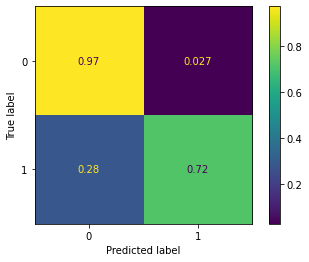

In [34]:
pipeline = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, pipeline)

La métrica objetivo AUC-ROC tiene un resultado similar al obtenido por 1-ArbolDeDecision. Nuevamente no se logra un buen resultado de Recall y eso se debe a que de los casos verdaderamente positivos el modelo selecciona como negativos al 28% (un 4% por encima del Arbol de Decision), esa tasa de Falsos Negativos perjudica directamente al Recall (recordando que `Recall = TP / (TP + FN)`. Sin embargo, la tasa de Falsos Positivos es considerablemente mas baja que la del modelo anterior, por lo que el resultado obtenido en Precision es mucho mejor (recordando que `Precision = TP / (TP + FP)`).

### Predicción HoldOut

In [24]:
utils.predecir_holdout_y_generar_csv(pipeline, 'Predicciones/2-RandomForest.csv')